In [1]:
from google.colab import files
uploaded = files.upload()

Saving alvote_sinc_dan.txt to alvote_sinc_dan.txt
Saving alvotr_sinc_dan.txt to alvotr_sinc_dan.txt
Saving teste_sinc_dan.txt to teste_sinc_dan.txt
Saving treino_sinc_dan.txt to treino_sinc_dan.txt


In [2]:
import pandas as pd
import numpy as np

In [3]:
def criar_dataset(nome_arquivo):
    dataset = []
    with open(nome_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()
        for linha in linhas:
            dado = linha.strip()  # Remove caracteres de quebra de linha e espaços em branco
            dataset.append(dado)
    return dataset

In [4]:
X_train = criar_dataset('/content/treino_sinc_dan.txt')
X_test =  criar_dataset('/content/teste_sinc_dan.txt')

y_train = criar_dataset('/content/alvotr_sinc_dan.txt')
y_test = criar_dataset('/content/alvote_sinc_dan.txt')

In [5]:
def transform_items_to_lists(input_list):
    transformed_list = [[item] for item in input_list]
    return transformed_list

In [6]:
X_train = np.array(transform_items_to_lists(X_train)).astype(float)
X_test = np.array(transform_items_to_lists(X_test)).astype(float)
y_train = np.array(transform_items_to_lists(y_train)).astype(float)
y_test = np.array(transform_items_to_lists(y_test)).astype(float)

In [7]:
import numpy as np
import pandas as pd


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class ELMRegressor:
    def __init__(self, hidden_size):
        self.hidden_size = hidden_size
        self.weights = None
        self.biases = None

    def train(self, X, y, epochs):
        # Add a column of ones to the input data for the bias term
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        # Generate random weights and biases for the hidden layer
        self.weights = np.random.uniform(-1, 1, (X.shape[1], self.hidden_size))
        self.biases = np.random.uniform(-1, 1, self.hidden_size)

        # Calculate mean square error during training
        mse = np.zeros(epochs)
        for epoch in range(epochs):
            H = sigmoid(np.dot(X, self.weights) + self.biases)  # Compute hidden layer activations
            self.output_weights = np.dot(np.linalg.pinv(H), y)  # Calculate output weights
            y_pred = np.dot(H, self.output_weights)
            mse[epoch] = np.mean((y - y_pred) ** 2)

        return mse


    def predict(self, X):
        # Add a column of ones to the input data for the bias term
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        # Compute the hidden layer activations
        H = sigmoid(np.dot(X, self.weights) + self.biases)
        # Calculate the predicted output
        y_pred = np.dot(H, self.output_weights)
        return y_pred


# Create an ELMRegressor and train it
elm = ELMRegressor(hidden_size=10)
epochs = 10


num_iterations = 50

# Make predictions on the test data
y_train_pred_all = np.zeros((X_train.shape[0], num_iterations))
y_test_pred_all = np.zeros((X_test.shape[0], num_iterations))

train_mse_all = np.zeros(num_iterations)
test_mse_all = np.zeros(num_iterations)
train_mse_std_all = np.zeros(num_iterations)
test_mse_std_all = np.zeros(num_iterations)

for i in range(num_iterations):



    mse = elm.train(X_train, y_train, epochs)

    # Predict outputs for the training data
    y_train_pred = elm.predict(X_train)

    # Predict outputs for the test data
    y_test_pred = elm.predict(X_test)

    # Store predictions
    y_train_pred_all[:, i] = y_train_pred.flatten()
    y_test_pred_all[:, i] = y_test_pred.flatten()

    # Calculate MSE
    train_mse = np.mean((y_train_pred - y_train.reshape(-1, 1)) ** 2, axis=0)
    test_mse = np.mean((y_test_pred - y_test.reshape(-1, 1)) ** 2, axis=0)

    # Calculate standard deviation of MSE
    train_mse_std = np.std((y_train_pred - y_train.reshape(-1, 1)) ** 2, axis=0)
    test_mse_std = np.std((y_test_pred - y_test.reshape(-1, 1)) ** 2, axis=0)

    # Store MSE and standard deviation for each iteration
    train_mse_all[i] = train_mse
    test_mse_all[i] = test_mse
    train_mse_std_all[i] = train_mse_std
    test_mse_std_all[i] = test_mse_std

# Calculate mean and standard deviation of predictions
y_train_pred_mean = np.mean(y_train_pred_all, axis=1)
y_train_pred_std = np.std(y_train_pred_all, axis=1)
y_test_pred_mean = np.mean(y_test_pred_all, axis=1)
y_test_pred_std = np.std(y_test_pred_all, axis=1)

# Calculate mean of MSE and standard deviation of MSE
train_mse_mean = np.mean(train_mse_all)
test_mse_mean = np.mean(test_mse_all)
train_mse_std_mean = np.mean(train_mse_std_all)
test_mse_std_mean = np.mean(test_mse_std_all)

# Create a table
results_table = pd.DataFrame({
    'Training MSE mean': train_mse_mean,
    'Test MSE mean': test_mse_mean,
    'Training MSE Std': train_mse_std_mean,
    'Test MSE Std': test_mse_std_mean
}, index=['Mean'])


In [8]:
train_mse_all

array([6.81275984e-04, 1.25732294e-04, 4.60553010e-04, 3.25946784e-04,
       4.96033888e-05, 9.29283462e-05, 3.17239716e-05, 1.51818123e-04,
       1.78398030e-04, 3.36819593e-04, 2.55158616e-06, 5.97177616e-05,
       1.69225502e-04, 7.36848396e-06, 8.53812431e-05, 1.98615707e-05,
       6.09243023e-04, 9.58859372e-05, 8.39646875e-06, 2.17783918e-06,
       2.71119566e-05, 6.06035126e-04, 8.71053956e-05, 1.34542207e-05,
       1.18126502e-05, 4.62133601e-04, 4.68448908e-05, 7.01227228e-06,
       2.66048866e-06, 1.18416886e-04, 1.07697897e-03, 9.96708481e-05,
       2.01243956e-04, 2.09386719e-06, 9.99596518e-07, 4.51845464e-06,
       4.51287011e-04, 7.47938549e-05, 2.66088254e-04, 1.36064949e-05,
       6.32052325e-05, 1.64934440e-04, 8.39353943e-06, 6.89384192e-05,
       1.44677123e-06, 2.05535659e-05, 7.58155104e-06, 1.64666613e-04,
       3.08359202e-04, 1.12728335e-05])

In [9]:
results_table

,Training MSE mean,Test MSE mean,Training MSE Std,Test MSE Std
Mean,0.000158,0.000159,0.000213,0.000223


In [10]:
import matplotlib.pyplot as plt

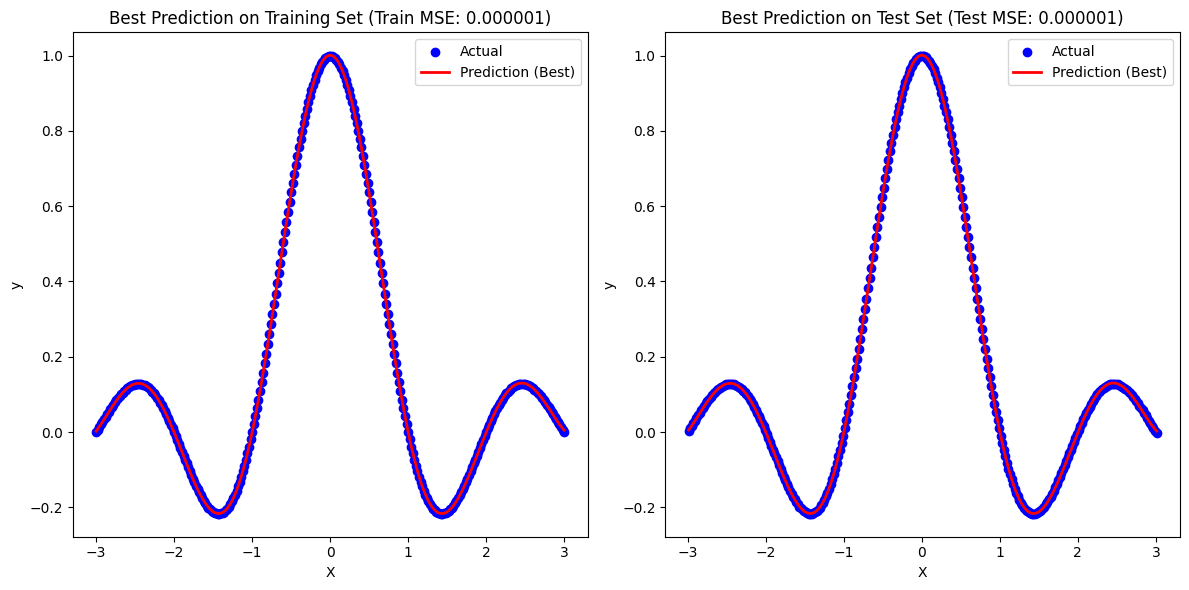

In [11]:
import matplotlib.pyplot as plt


# Find the iteration with the lowest train and test MSE
best_train_iteration = np.argmin(train_mse_all)
best_train_mse = train_mse_all[best_train_iteration]
best_y_train_pred = y_train_pred_all[:, best_train_iteration]

best_test_iteration = np.argmin(test_mse_all)
best_test_mse = test_mse_all[best_test_iteration]
best_y_test_pred = y_test_pred_all[:, best_test_iteration]

# Plot the best predictions with the lowest train and test MSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, best_y_train_pred, color='red', linewidth=2, label='Prediction (Best)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Prediction on Training Set (Train MSE: {:.6f})'.format(best_train_mse))
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, best_y_test_pred, color='red', linewidth=2, label='Prediction (Best)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Prediction on Test Set (Test MSE: {:.6f})'.format(best_test_mse))
plt.legend()

plt.tight_layout()
plt.show()
